In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [29]:
image_path = "E:/CS_Project/Football/outputs/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

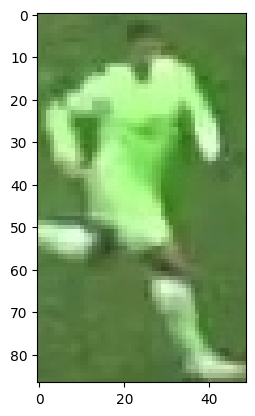

In [30]:
plt.imshow(image)
plt.show()

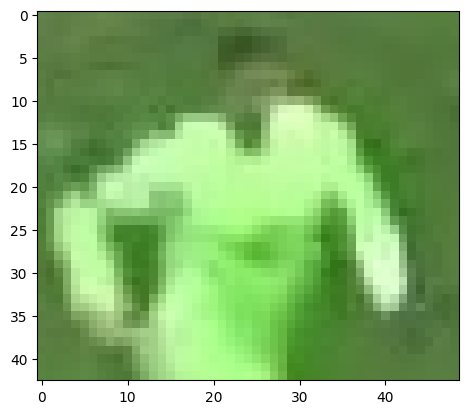

In [31]:
# Take the top half of the image
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)

Cluster the image into two

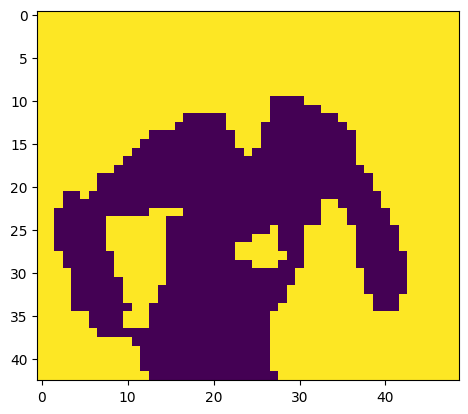

In [32]:
#Reshape the image into 2d Array
image_2d = top_half_image.reshape(-1,3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels intop the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Displayt he clustered image
plt.imshow(clustered_image)
plt.show()

In [33]:
corner_clusters = [clustered_image[0,0], clustered_image[0,1],clustered_image[-1,0],clustered_image[-1,-1]]
# The non plkayer one would be the one to appear most on the boundary
# because the bounding box is supposed to keep the player in it at all times
# The player would never lie in those locations
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)


1


In [26]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [35]:
cluster_centers = kmeans.cluster_centers_
player_cluster_center = cluster_centers[player_cluster]
print(player_cluster_center)

[171.52380952 235.9047619  143.33197279]


In [1]:
!pip install filterpy



     ---------------------------------------- 0.0/178.0 kB ? eta -:--:--
     ------ --------------------------------- 30.7/178.0 kB ? eta -:--:--
     ------------------------ ------------- 112.6/178.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 178.0/178.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110542 sha256=8b9a755bc0b23303776c2ba99e48970e55c48b72d914ef5b158b5ab604b40c25
  Stored in directory: c:\users\anjus\appdata\local\pip\cache\wheels\77\bf\4c\b0c3f4798a0166668752312a67118b27a3cd341e13ac0ae6ee
Successfully built filterpy
